<a id='top'> </a>
Author: [James Bourbeau](http://www.jamesbourbeau.com)

In [1]:
%load_ext watermark
%watermark -u -d -v -p numpy,matplotlib,scipy,pandas,sklearn,mlxtend

last updated: 2017-05-26 

CPython 2.7.13
IPython 5.3.0

numpy 1.12.1
matplotlib 2.0.2
scipy 0.19.0
pandas 0.20.1
sklearn 0.18.1
mlxtend 0.6.0


In [2]:
%matplotlib inline
from __future__ import division, print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn.apionly as sns
from sklearn.metrics import accuracy_score

import comptools as comp
import comptools.analysis.plotting as plotting
    
color_dict = comp.analysis.get_color_dict()

/home/jbourbeau/.virtualenvs/composition/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
config = 'IC79'
# config = 'IC86.2012'
comp_list = ['light', 'heavy']
pipeline_str = 'GBDT'
feature_list, feature_labels = comp.get_training_features()

In [4]:
sim_df_train, sim_df_test = comp.load_dataframe(datatype='sim', config=config)
pipeline = comp.get_pipeline(pipeline_str)

Starting out with 398044 sim events
sim quality cut event flow:
      passed_IceTopQualityCuts:    1.0    1.0
FractionContainment_Laputop_InIce:  0.776  0.776
       passed_InIceQualityCuts:  0.786   0.75
                 num_hits_1_60:  0.999   0.75




In [6]:
light_mask = sim_df_train['MC_comp_class'] == 'light'
heavy_mask = sim_df_train['MC_comp_class'] == 'heavy'
null_mask = ~sim_df_train['refit_beta'].isnull()
energy_mask = (sim_df_train['log_s125'] > 1.5) & (sim_df_train['log_s125'] <= 1.75)
zenith_mask = (sim_df_train['lap_cos_zenith'] > 0.9) & (sim_df_train['lap_cos_zenith'] <= 1.0)
# radius_mask = (sim_df_train['avg_inice_radius_1_60'] > 120) & (sim_df_train['avg_inice_radius_1_60'] <= 130)

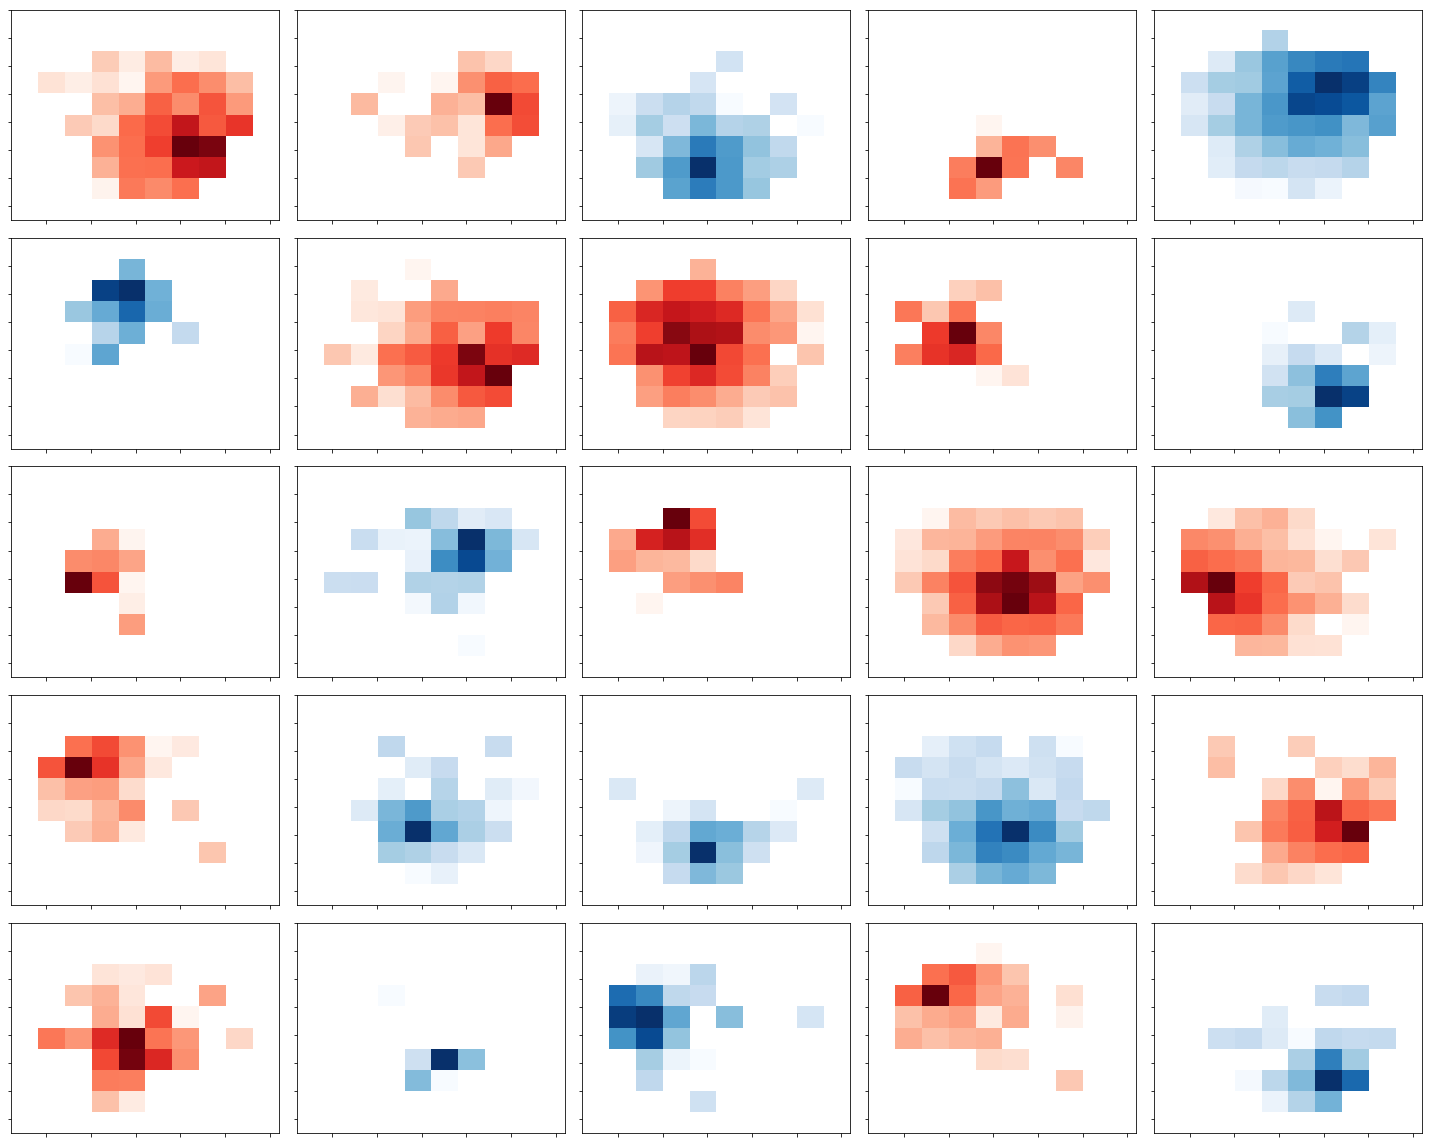

In [11]:
n = 5
fig, axarr = plt.subplots(n, n, figsize=(20, 16))
for idx, ax in zip(range(n**2), axarr.flatten()):
    row = sim_df_train.iloc[idx]
#     bins = np.linspace(-600, 600, 20)
    dist = 150
    bins = np.arange(-700, 700+dist, dist)
    x = row['tank_x']
    y = row['tank_y']
    charge = row['tank_charge']
    
    not_null_mask = ~np.isnan(x) & ~np.isnan(y) & ~np.isnan(charge)
    x = x[not_null_mask]
    y = y[not_null_mask]
    charge = charge[not_null_mask]
    cmap = 'Reds' if row['MC_comp_class'] == 'heavy' else 'Blues'

    plotting.histogram_2D(x, y, bins=bins,
                          weights=charge/charge.sum(), ax=ax,
                          colorbar=False, log_counts=True, cmap=cmap)
    ax.get_xaxis().set_ticklabels([])
    ax.get_yaxis().set_ticklabels([])
plt.savefig('/home/jbourbeau/public_html/figures/icetop-event.png')
plt.show()